In [1]:
! pip install eli5

In [2]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Wczytywanie Danych

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/ matrix/ matrix_two'

/content/drive/My Drive/Colab Notebooks/ matrix/ matrix_two


In [8]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [0]:
#!pip uninstall numpy -y

In [0]:
#!pip install numpy==1.15.4

In [9]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

Dummy model

In [11]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [13]:
feats = ['car_id']
X = df[feats].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X,y)
y_predict = model.predict(X)

mean_absolute_error(y, y_predict)

39465.934630440985

In [15]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [16]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [18]:
df = df[df['price_currency'] != 'EUR']
df.shape

(106290, 155)

Features

In [19]:
for feat in df.columns:
  print(feat)

breadcrumb
created_at
price_currency
price_details
price_value
seller_address
seller_name
seller_type
feature_czujniki-parkowania-przednie
feature_poduszka-powietrzna-chroniąca-kolana
feature_kurtyny-powietrzne
feature_klimatyzacja-dwustrefowa
feature_światła-led
feature_czujnik-zmierzchu
feature_elektrycznie-ustawiane-lusterka
feature_asr-(kontrola-trakcji)
feature_poduszka-powietrzna-kierowcy
feature_cd
feature_elektryczne-szyby-przednie
feature_poduszka-powietrzna-pasażera
feature_system-start-stop
feature_światła-do-jazdy-dziennej
feature_komputer-pokładowy
feature_elektryczne-szyby-tylne
feature_klimatyzacja-manualna
feature_tapicerka-welurowa
feature_czujnik-deszczu
feature_światła-przeciwmgielne
feature_ogrzewanie-postojowe
feature_radio-niefabryczne
feature_regulowane-zawieszenie
feature_ogranicznik-prędkości
feature_zmieniarka-cd
feature_szyberdach
feature_isofix
feature_asystent-pasa-ruchu
feature_alufelgi
feature_bluetooth
feature_nawigacja-gps
feature_asystent-parkowania
fe

In [21]:
df['param_color'].factorize()[0] #przypisuje liczby zamiast stringów

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CAT = '__cat'

for feat in df.columns:
  if isinstance(df[feat][0], list): continue

  factorize_values = df[feat].factorize()[0]

  if SUFFIX_CAT in feat:
    df[feat] = factorize_values
  else:
    df[feat + SUFFIX_CAT] = factorize_values

In [0]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]

In [25]:
cat_feats

['created_at__cat',
 'price_currency__cat',
 'price_details__cat',
 'price_value__cat',
 'seller_address__cat',
 'seller_name__cat',
 'seller_type__cat',
 'feature_czujniki-parkowania-przednie__cat',
 'feature_poduszka-powietrzna-chroniąca-kolana__cat',
 'feature_kurtyny-powietrzne__cat',
 'feature_klimatyzacja-dwustrefowa__cat',
 'feature_światła-led__cat',
 'feature_czujnik-zmierzchu__cat',
 'feature_elektrycznie-ustawiane-lusterka__cat',
 'feature_asr-(kontrola-trakcji)__cat',
 'feature_poduszka-powietrzna-kierowcy__cat',
 'feature_cd__cat',
 'feature_elektryczne-szyby-przednie__cat',
 'feature_poduszka-powietrzna-pasażera__cat',
 'feature_system-start-stop__cat',
 'feature_światła-do-jazdy-dziennej__cat',
 'feature_komputer-pokładowy__cat',
 'feature_elektryczne-szyby-tylne__cat',
 'feature_klimatyzacja-manualna__cat',
 'feature_tapicerka-welurowa__cat',
 'feature_czujnik-deszczu__cat',
 'feature_światła-przeciwmgielne__cat',
 'feature_ogrzewanie-postojowe__cat',
 'feature_radio-ni

In [0]:
cat_feats = [x for x in cat_feats if 'price' not in x]

In [27]:
cat_feats

['created_at__cat',
 'seller_address__cat',
 'seller_name__cat',
 'seller_type__cat',
 'feature_czujniki-parkowania-przednie__cat',
 'feature_poduszka-powietrzna-chroniąca-kolana__cat',
 'feature_kurtyny-powietrzne__cat',
 'feature_klimatyzacja-dwustrefowa__cat',
 'feature_światła-led__cat',
 'feature_czujnik-zmierzchu__cat',
 'feature_elektrycznie-ustawiane-lusterka__cat',
 'feature_asr-(kontrola-trakcji)__cat',
 'feature_poduszka-powietrzna-kierowcy__cat',
 'feature_cd__cat',
 'feature_elektryczne-szyby-przednie__cat',
 'feature_poduszka-powietrzna-pasażera__cat',
 'feature_system-start-stop__cat',
 'feature_światła-do-jazdy-dziennej__cat',
 'feature_komputer-pokładowy__cat',
 'feature_elektryczne-szyby-tylne__cat',
 'feature_klimatyzacja-manualna__cat',
 'feature_tapicerka-welurowa__cat',
 'feature_czujnik-deszczu__cat',
 'feature_światła-przeciwmgielne__cat',
 'feature_ogrzewanie-postojowe__cat',
 'feature_radio-niefabryczne__cat',
 'feature_regulowane-zawieszenie__cat',
 'feature_

In [29]:
X = df[cat_feats].values
y = df['price_value'].values

model =  DecisionTreeRegressor(max_depth = 5)
scores  = cross_val_score(model, X, y, cv=3, scoring = 'neg_mean_absolute_error')
np.mean(scores)

-19566.588937368324

In [32]:
m = DecisionTreeRegressor(max_depth = 5)
m.fit(X,y)

imp = PermutationImportance(m, random_state = 0).fit(X,y)
eli5.show_weights(imp,feature_names=cat_feats)

Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


In [0]:
def group_and_barplot(feat_grouphy, feat_agg='price_value', agg_func=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
      df
      .groupby(feat_grouphy)[feat_agg]
      .agg(agg_func)
      .sort_values(by=feat_sort, ascending=False)
      .head(top)



  ).plot(kind='bar', figsize=(15,5), subplots=subplots)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9015c50588>,
      dtype=object)

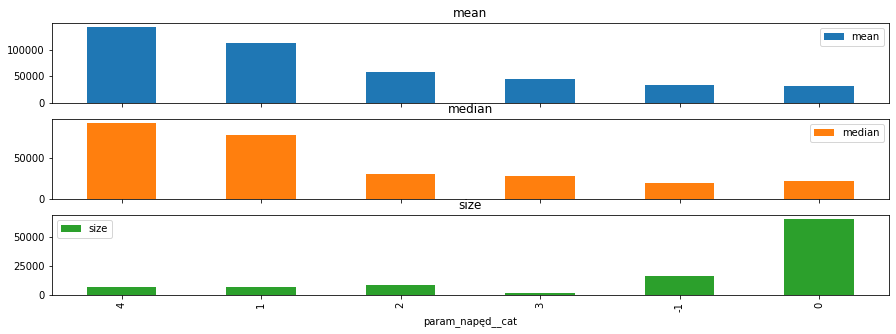

In [35]:
group_and_barplot('param_napęd__cat')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f901a822ac8>,
      dtype=object)

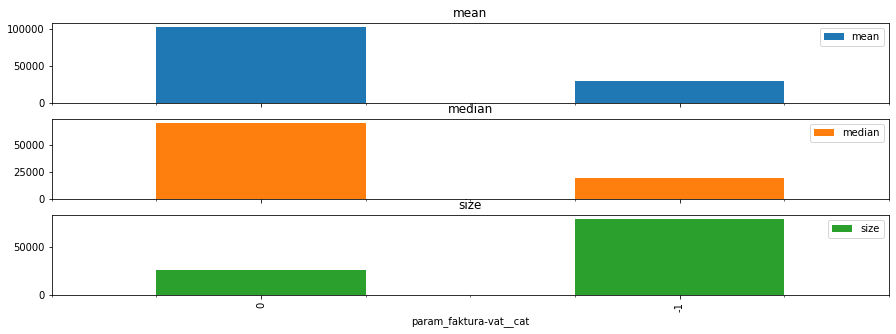

In [36]:
group_and_barplot('param_faktura-vat__cat')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f900f543cc0>,
      dtype=object)

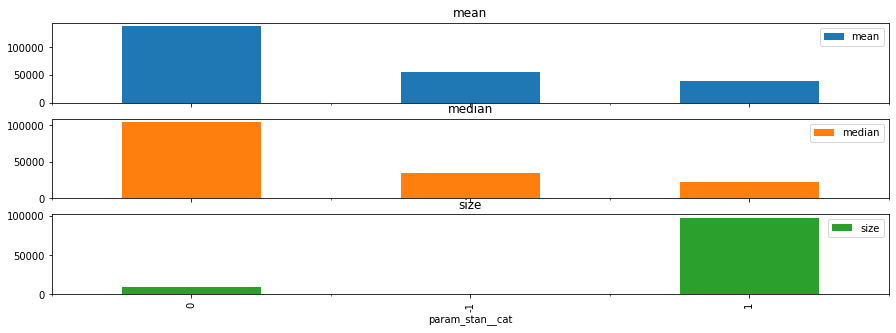

In [37]:
group_and_barplot('param_stan__cat')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f900f416470>,
      dtype=object)

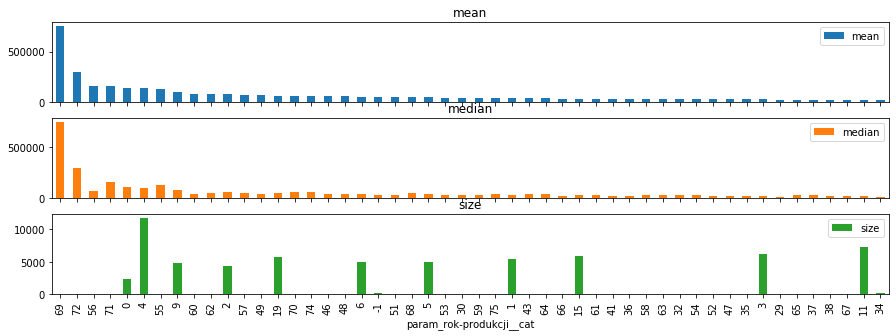

In [38]:
group_and_barplot('param_rok-produkcji__cat')